In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv("data.csv",encoding="latin1")
x = df["no2"].dropna().values


C:\Users\Kushali Gupta\AppData\Local\Temp\ipykernel_40068\1384207437.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data.csv",encoding="latin1")


In [11]:
r = 102317148
a_r = 0.05 * (r % 7)
b_r = 0.3 * (r % 5 + 1)
z = x + a_r * np.sin(b_r * x)

In [12]:
mu = np.mean(z)
sigma = np.std(z)
lam = 1 / (2 * sigma**2)
c = 1 / np.sqrt(2 * np.pi * sigma**2)

In [13]:
print("Lambda:", lam)
print("Mu:", mu)
print("c:", c)

Lambda: 0.0014599899081690275
Mu: 25.806338519611327
c: 0.02155757921239688



Result Table:
    Parameter      Value
0  Lambda (λ)   0.001460
1      Mu (μ)  25.806339
2           c   0.021558


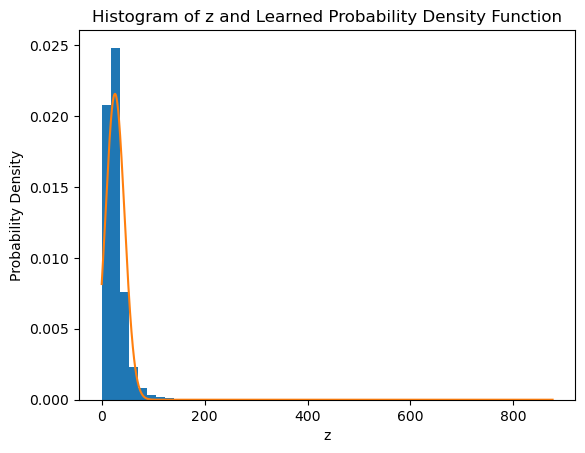

In [14]:
results = pd.DataFrame({
    "Parameter": ["Lambda (λ)", "Mu (μ)", "c"],
    "Value": [lam, mu, c]
})

print("\nResult Table:")
print(results)

z_sorted = np.sort(z)
pdf = c * np.exp(-lam * (z_sorted - mu)**2)

plt.figure()
plt.hist(z, bins=50, density=True)
plt.plot(z_sorted, pdf)
plt.title("Histogram of z and Learned Probability Density Function")
plt.xlabel("z")
plt.ylabel("Probability Density")
plt.show()